In [ ]:
!pip install numpy pandas scikit-learn matplotlib seaborn imbalanced-learn

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [2]:
dataset = pd.read_csv("adult.data")

In [3]:
dataset.columns = ['age','workclass','fnlwgt','education',
                   'education-num','marital-status','occupation','relationship',
                   'race','sex','capital-gain','capital-loss','hours-per-week','native-country','earning']

In [4]:
dataset.shape

(32560, 15)

In [5]:
dataset.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earning
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education-num   32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  earning         32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
dataset.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,earning
count,32560.000000,32560,3.256000e+04,32560,32560.000000,32560,32560,32560,32560,32560,32560.000000,32560.000000,32560.000000,32560,32560
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27815,21789,NaN,NaN,NaN,29169,24719
mean,38.581634,NaN,1.897818e+05,NaN,10.080590,NaN,NaN,NaN,NaN,NaN,1077.615172,87.306511,40.437469,NaN,NaN
std,13.640642,NaN,1.055498e+05,NaN,2.572709,NaN,NaN,NaN,NaN,NaN,7385.402999,402.966116,12.347618,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178315e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783630e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370545e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [8]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
earning           0
dtype: int64

In [9]:
dataset.duplicated().sum()

np.int64(24)

In [10]:
dataset = dataset.drop_duplicates(keep='first')

In [11]:
dataset.duplicated().sum()

np.int64(0)

In [12]:
# Strip leading/trailing whitespace from the column
dataset['earning'] = dataset['earning'].str.strip()

# Replace the values
dataset['earning'] = dataset['earning'].replace({'<=50K': 0, '>50K': 1})

# Ensure the column is of integer type
dataset['earning'] = dataset['earning'].astype(int)


C:\Users\muzam\AppData\Local\Temp\ipykernel_16192\1263101085.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['earning'] = dataset['earning'].replace({'<=50K': 0, '>50K': 1})


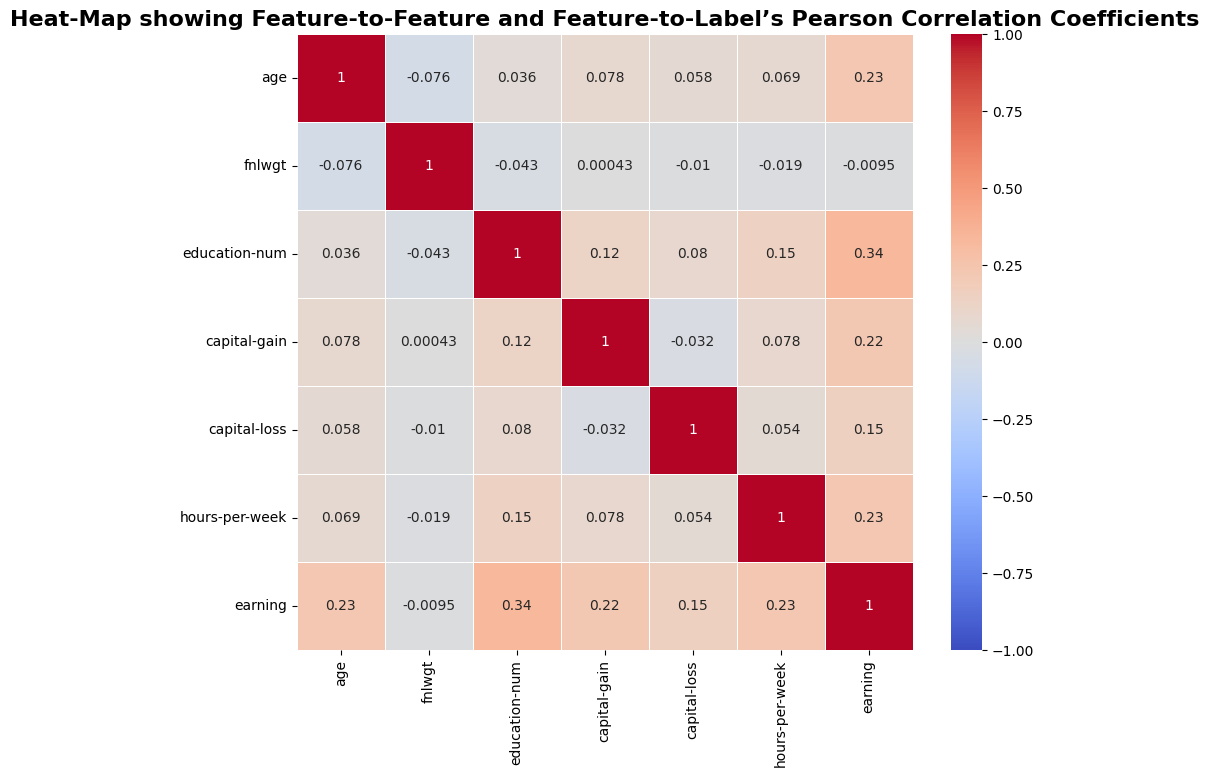

In [13]:
# Calculate the correlation matrix
correlation_matrix = dataset[['age', 'fnlwgt', 'education-num', 'capital-gain','capital-loss', 'hours-per-week', 'earning']].corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

# Add title
plt.title('Heat-Map showing Feature-to-Feature and Feature-to-Label’s Pearson Correlation Coefficients', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

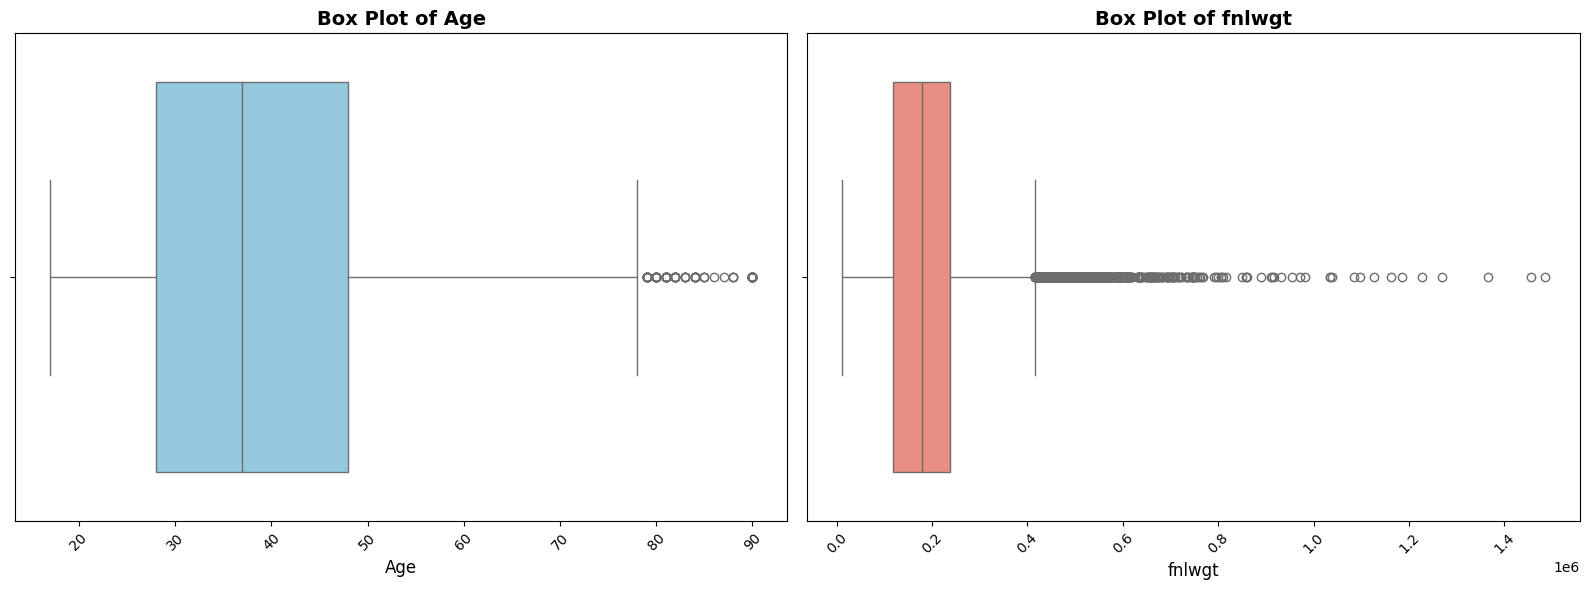

In [14]:
plt.figure(figsize=(16, 6))

# Create a subplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x='age', data=dataset, color='skyblue')
plt.title('Box Plot of Age', fontsize=14, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation=45)

# Create a subplot for fnlwgt
plt.subplot(1, 2, 2)
sns.boxplot(x='fnlwgt', data=dataset, color='salmon')
plt.title('Box Plot of fnlwgt', fontsize=14, fontweight='bold')
plt.xlabel('fnlwgt', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

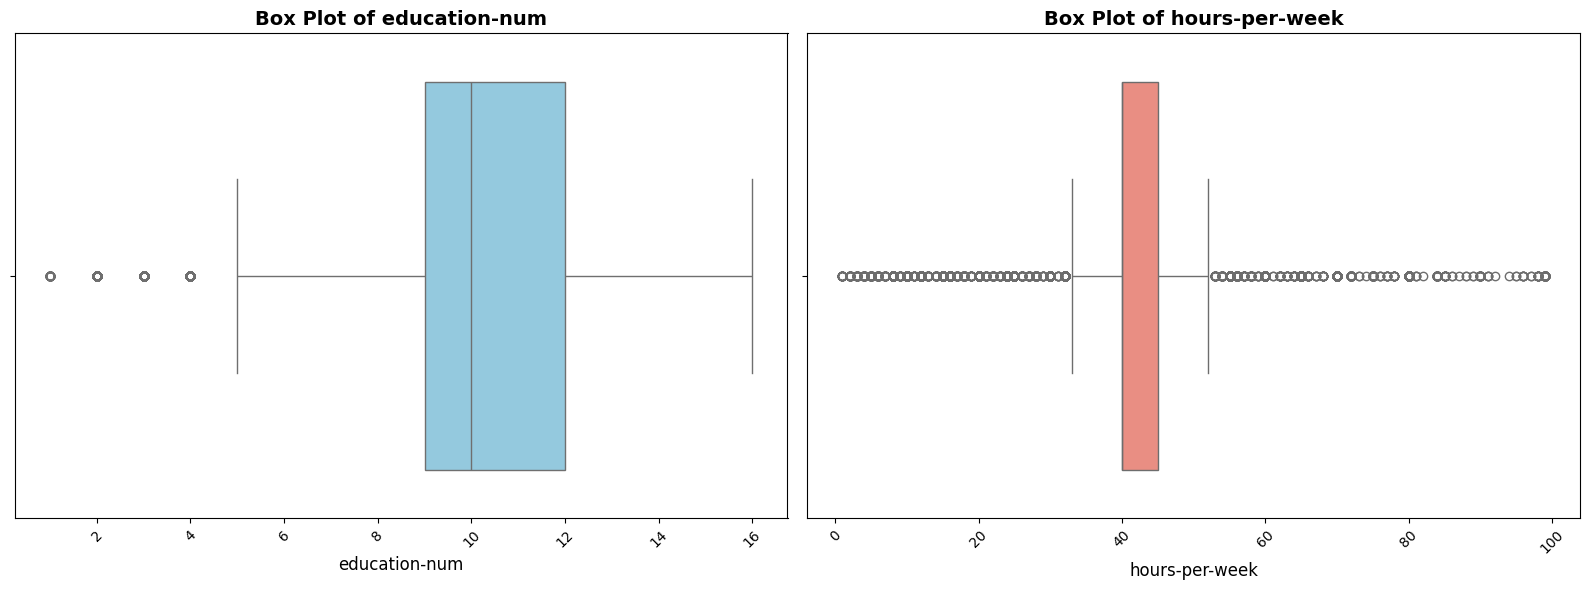

In [15]:
plt.figure(figsize=(16, 6))

# Create a subplot for education num
plt.subplot(1, 2, 1)
sns.boxplot(x='education-num', data=dataset, color='skyblue')
plt.title('Box Plot of education-num', fontsize=14, fontweight='bold')
plt.xlabel('education-num', fontsize=12)
plt.xticks(rotation=45)

# Create a subplot for hours-per-week
plt.subplot(1, 2, 2)
sns.boxplot(x='hours-per-week', data=dataset, color='salmon')
plt.title('Box Plot of hours-per-week', fontsize=14, fontweight='bold')
plt.xlabel('hours-per-week', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

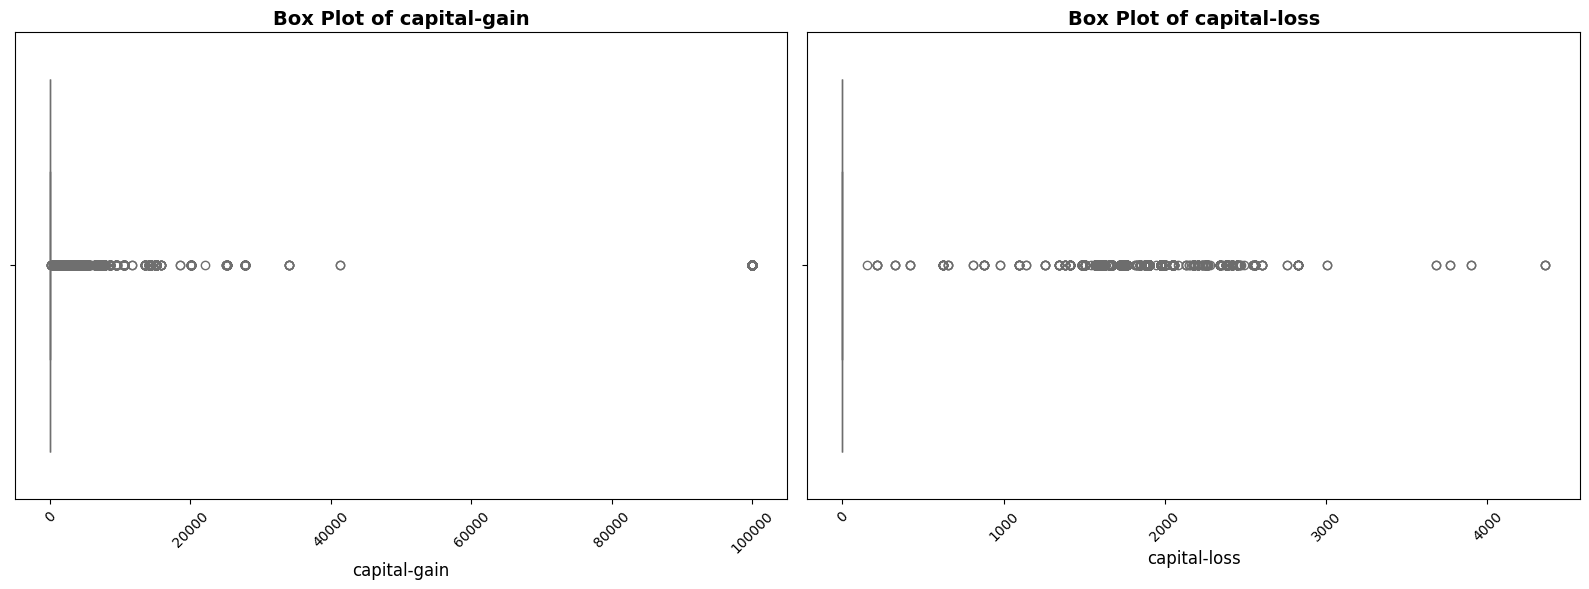

In [16]:
plt.figure(figsize=(16, 6))

# Create a subplot for capital-gain
plt.subplot(1, 2, 1)
sns.boxplot(x='capital-gain', data=dataset, color='skyblue')
plt.title('Box Plot of capital-gain', fontsize=14, fontweight='bold')
plt.xlabel('capital-gain', fontsize=12)
plt.xticks(rotation=45)

# Create a subplot for capital-loss
plt.subplot(1, 2, 2)
sns.boxplot(x='capital-loss', data=dataset, color='salmon')
plt.title('Box Plot of capital-loss', fontsize=14, fontweight='bold')
plt.xlabel('capital-loss', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
categorical_columns = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])


In [18]:
dataset['earning'].value_counts()

earning
0    24697
1     7839
Name: count, dtype: int64

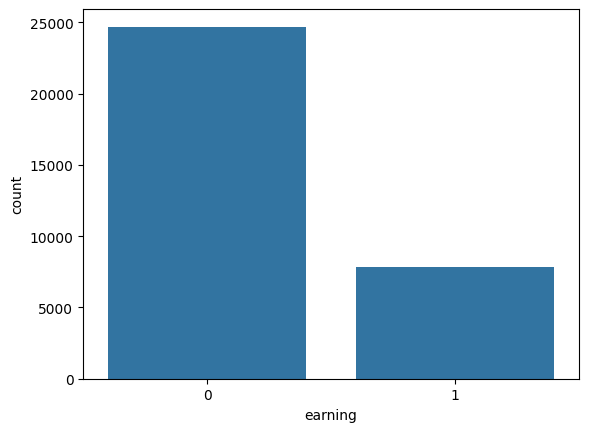

In [19]:
sns.countplot(dataset, x='earning')
plt.show()

In [22]:
X = dataset.iloc[:, range(1,14)]
y = dataset.iloc[:,14]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
resampler = RandomOverSampler(random_state=0)
X_train_oversampled, y_train_oversampled = resampler.fit_resample(X_train, y_train)

In [26]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_oversampled)
X_test_s = sc.transform(X_test)

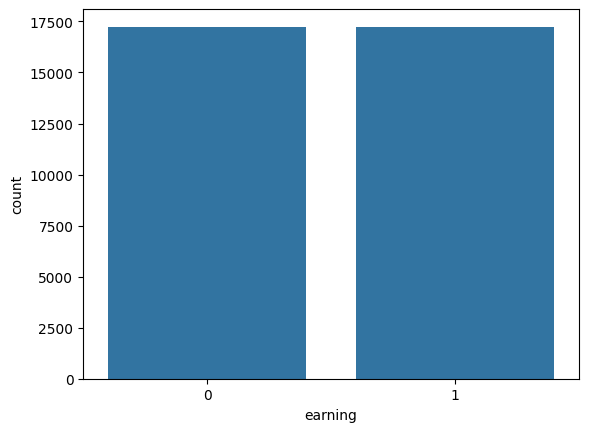

In [27]:
sns.countplot(x=y_train_oversampled)
plt.show()

# K Nearest Neighbours Classification

In [28]:
knnclassifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knnclassifier.fit(X_train_s, y_train_oversampled)

KNeighborsClassifier()

In [29]:
y_pred = knnclassifier.predict(X_test_s)

In [30]:
# Computing the accuracy and Making the Confusion Matrix
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)

accuracy:0.76


Confusion Matrix:
[[5728 1727]
 [ 619 1687]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      7455
           1       0.49      0.73      0.59      2306

    accuracy                           0.76      9761
   macro avg       0.70      0.75      0.71      9761
weighted avg       0.81      0.76      0.77      9761



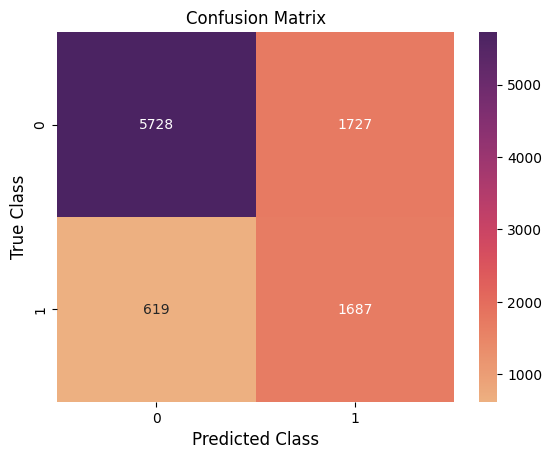

In [31]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()

# Decision tree

In [32]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train_s, y_train_oversampled)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [33]:
# Predicting the Test set results
y_pred = DTclassifier.predict(X_test_s)

In [34]:
# Computing the accuracy and Making the Confusion Matrix
acc=metrics.accuracy_score(y_test,y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm,'\n\n')
print('--------------------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n",)
print (result)

accuracy:0.82


Confusion Matrix:
[[6535  920]
 [ 884 1422]] 


--------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7455
           1       0.61      0.62      0.61      2306

    accuracy                           0.82      9761
   macro avg       0.74      0.75      0.75      9761
weighted avg       0.82      0.82      0.82      9761



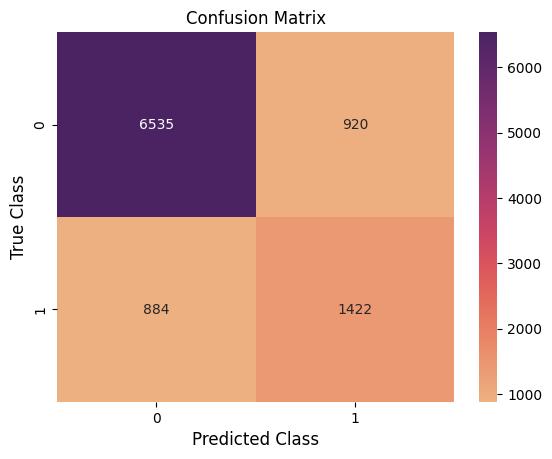

In [35]:
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

plt.show()